In [640]:
import pandas as pd 
import joblib as jl
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [641]:
vars =['Churn Reason_Attitude of support person', 'Unnamed: 0',
       'Churn Reason_Competitor had better devices',
       'Churn Reason_Competitor made better offer',
       'Churn Reason_Competitor offered higher download speeds',
       'Churn Reason_Competitor offered more data', 'Churn Reason_Deceased',
       'Churn Reason_Extra data charges',
       'Churn Reason_Lack of affordable download/upload speed',
       'Churn Reason_Lack of self-service on Website',
       'Churn Reason_Limited range of services',
       'Churn Reason_Long distance charges', 'Churn Reason_Moved',
       'Churn Reason_Network reliability',
       'Churn Reason_Poor expertise of online support',
       'Churn Reason_Poor expertise of phone support',
       'Churn Reason_Price too high', 'Churn Reason_Product dissatisfaction',
       'Churn Reason_Service dissatisfaction', 'Churn Reason_cliente_activo', 

       "Churn Reason_Don't know", "Churn Value" , "Unnamed: 0", "Gender_Male", "Senior Citizen_Yes", "Contract_Two year", "Payment Method_Credit card (automatic)",
       "Partner_Yes" , "Phone Service_Yes","Multiple Lines_No phone service", "Online Security_No internet service","Internet Service_Fiber optic"
       ]

In [648]:
model = jl.load('random5.pkl')
data =  pd.read_csv("dataML.csv")
data_model = data.copy(deep=True)
data_model.drop(vars , axis=1 , inplace= True)

scaler = StandardScaler()
datosScaled = scaler.fit_transform(data_model)

ipca = IncrementalPCA( n_components=5, batch_size= 10).fit(datosScaled)
datosProcesados = ipca.transform(datosScaled)

reales = np.array(data["Churn Value"])

predicciones = model.predict(datosProcesados)

print(f""" Presición_Modelo : {accuracy_score(predicciones, reales)} """)

 Presición_Modelo : 0.8279294653014789 


1 el cliente dejo la empresa y 0 el cliente permanecio

<Figure size 1100x1100 with 0 Axes>

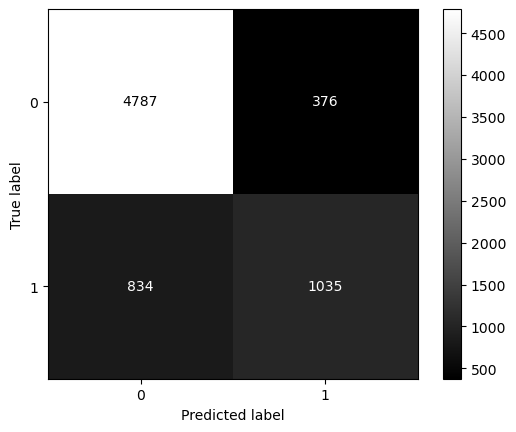

In [645]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(reales, predicciones ,labels= model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_).plot(cmap = "gray")
plt.show()

In [649]:
data["predicciones"] = predicciones
data["reales"] = reales
export = data.drop(vars , axis = 1)
export
#export.to_csv("prediccioes.csv")

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Dependents_Yes,Multiple Lines_Yes,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,...,Streaming TV_Yes,Contract_One year,Paperless Billing_Yes,Internet Service_No,Streaming Movies_No internet service,Streaming Movies_Yes,Payment Method_Electronic check,Payment Method_Mailed check,predicciones,reales
0,2,53.85,108.15,86,3239,0,0,1,0,1,...,0,0,1,0,0,0,0,1,1,1
1,2,70.70,151.65,67,2701,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
2,8,99.65,820.50,86,5372,1,1,0,0,0,...,1,0,1,0,0,1,1,0,1,1
3,28,104.80,3046.05,84,5003,1,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
4,49,103.70,5036.30,89,5340,1,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,72,21.15,1419.40,45,5306,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,0
7028,24,84.80,1990.50,59,2140,1,1,1,0,0,...,1,1,1,0,0,1,0,1,0,0
7029,72,103.20,7362.90,71,5560,1,1,0,0,1,...,1,1,1,0,0,1,0,0,0,0
7030,11,29.60,346.45,59,2793,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
